#GEDI L1B Data Processing Script
Author: Savannah Cooley

Version modified by Tassio Koiti Igawa

Repository - Original code: https://github.com/savcooley/full_waveform_lidar_training.git

---



In [27]:
# 1. Clone the GitHub Repository
# To access the notebook and any supplementary files, clone the repository into your Colab environment by runing the following command:
!git clone https://github.com/savcooley/full_waveform_lidar_training.git.

Cloning into 'full_waveform_lidar_training.git.'...
fatal: could not read Username for 'https://github.com': No such device or address


In [28]:
# 2.  Install Required Libraries
# Install the necessary Python libraries using pip.
!pip install earthaccess h5py geopandas matplotlib seaborn requests shapely folium
!pip install --upgrade earthaccess

# Import libraries
import os
import h5py
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point, Polygon
import folium
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')
import earthaccess


print("All libraries imported successfully!")

All libraries imported successfully!


In [29]:
# 3. Mount Your Google Drive
# Mounting your Google Drive allows the notebook to save output files and access data you may have stored. You will be prompted to authorize Colab to access your drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


✓ Successfully authenticated with NASA Earthdata!
Area of Interest (Bounding Box): [-53.29222822843251, -3.740016664673107, -52.65643629181753, -3.1698933787883066]
Longitude range: -53.29222822843251 to -52.65643629181753
Latitude range: -3.740016664673107 to -3.1698933787883066
🎯 Using default AOI - will prioritize 5th granule for demo efficiency
Temporal range: 2024-06-01 to 2025-10-22
Processing Full Power beams only: ['BEAM0101', 'BEAM0110', 'BEAM1000', 'BEAM1011']

🔍 Searching for GEDI L1B granules...
Searching for GEDI L1B data...
  Bounding box: [-53.29222822843251, -3.740016664673107, -52.65643629181753, -3.1698933787883066]
  Date range: 2024-06-01 to 2025-10-22
  Max results: 2000
Found 24 GEDI L1B granules

📋 Found granules:
  1. GEDI01_B_2024163195755_O31141_04_T07120_02_006_02_V002
  2. GEDI01_B_2024176033257_O31332_01_T06470_02_006_03_V002 (← DEMO PRIORITY)
  ... and 22 more granules

🚀 Starting processing with automatic retry...

PROCESSANDO GRANULE 1/24: GEDI01_B_20241

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

✓ Baixado: GEDI01_B_2024163195755_O31141_04_T07120_02_006_02_V002.h5 (2.70 GB)

Opening GEDI file: GEDI01_B_2024163195755_O31141_04_T07120_02_006_02_V002.h5
Available beams: ['BEAM0000', 'BEAM0001', 'BEAM0010', 'BEAM0011', 'BEAM0101', 'BEAM0110', 'BEAM1000', 'BEAM1011']
Full Power beams found: ['BEAM0101', 'BEAM0110', 'BEAM1000', 'BEAM1011']

  Processing BEAM0101...
    Total shots in beam: 168407
    Shots in AOI: 771
    ✓ Extracted 771 shots from BEAM0101

  Processing BEAM0110...
    Total shots in beam: 167852
    Shots in AOI: 748
    ✓ Extracted 748 shots from BEAM0110

  Processing BEAM1000...
    Total shots in beam: 168031
    Shots in AOI: 706
    ✓ Extracted 706 shots from BEAM1000

  Processing BEAM1011...
    Total shots in beam: 168175
    Shots in AOI: 688
    ✓ Extracted 688 shots from BEAM1011

Applying quality filters...
  Criteria: degrade_flag = 0, stale_return_flag = 0
  BEAM0101: 771 → 771 shots (100.0% retained)
  BEAM0110: 748 → 748 shots (100.0% retained)
  B

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

✓ Baixado: GEDI01_B_2024176033257_O31332_01_T06470_02_006_03_V002.h5 (2.07 GB)

Opening GEDI file: GEDI01_B_2024176033257_O31332_01_T06470_02_006_03_V002.h5
Available beams: ['BEAM0000', 'BEAM0001', 'BEAM0010', 'BEAM0011', 'BEAM0101', 'BEAM0110', 'BEAM1000', 'BEAM1011']
Full Power beams found: ['BEAM0101', 'BEAM0110', 'BEAM1000', 'BEAM1011']

  Processing BEAM0101...
    Total shots in beam: 95701
    Shots in AOI: 80
    ✓ Extracted 80 shots from BEAM0101

  Processing BEAM0110...
    Total shots in beam: 105344
    Shots in AOI: 103
    ✓ Extracted 103 shots from BEAM0110

  Processing BEAM1000...
    Total shots in beam: 96676
    Shots in AOI: 122
    ✓ Extracted 122 shots from BEAM1000

  Processing BEAM1011...
    Total shots in beam: 95401
    Shots in AOI: 147
    ✓ Extracted 147 shots from BEAM1011

Applying quality filters...
  Criteria: degrade_flag = 0, stale_return_flag = 0
  BEAM0101: 80 → 80 shots (100.0% retained)
  BEAM0110: 103 → 103 shots (100.0% retained)
  BEAM1000

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

✓ Baixado: GEDI01_B_2024180015712_O31393_01_T09622_02_006_03_V002.h5 (2.11 GB)

Opening GEDI file: GEDI01_B_2024180015712_O31393_01_T09622_02_006_03_V002.h5
Available beams: ['BEAM0000', 'BEAM0001', 'BEAM0010', 'BEAM0011', 'BEAM0101', 'BEAM0110', 'BEAM1000', 'BEAM1011']
Full Power beams found: ['BEAM0101', 'BEAM0110', 'BEAM1000', 'BEAM1011']

  Processing BEAM0101...
    Total shots in beam: 98075
    Shots in AOI: 1341
    ✓ Extracted 1341 shots from BEAM0101

  Processing BEAM0110...
    Total shots in beam: 107678
    Shots in AOI: 1343
    ✓ Extracted 1343 shots from BEAM0110

  Processing BEAM1000...
    Total shots in beam: 99065
    Shots in AOI: 1340
    ✓ Extracted 1340 shots from BEAM1000

  Processing BEAM1011...
    Total shots in beam: 97763
    Shots in AOI: 1345
    ✓ Extracted 1345 shots from BEAM1011

Applying quality filters...
  Criteria: degrade_flag = 0, stale_return_flag = 0
  BEAM0101: 1341 → 1248 shots (93.1% retained)
  BEAM0110: 1343 → 1291 shots (96.1% retain

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

✓ Baixado: GEDI01_B_2024206031011_O31797_04_T04733_02_006_03_V002.h5 (2.62 GB)

Opening GEDI file: GEDI01_B_2024206031011_O31797_04_T04733_02_006_03_V002.h5
Available beams: ['BEAM0000', 'BEAM0001', 'BEAM0010', 'BEAM0011', 'BEAM0101', 'BEAM0110', 'BEAM1000', 'BEAM1011']
Full Power beams found: ['BEAM0101', 'BEAM0110', 'BEAM1000', 'BEAM1011']

  Processing BEAM0101...
    Total shots in beam: 168389
    Shots in AOI: 942
    ✓ Extracted 942 shots from BEAM0101

  Processing BEAM0110...
    Total shots in beam: 167992
    Shots in AOI: 961
    ✓ Extracted 961 shots from BEAM0110

  Processing BEAM1000...
    Total shots in beam: 167946
    Shots in AOI: 985
    ✓ Extracted 985 shots from BEAM1000

  Processing BEAM1011...
    Total shots in beam: 167983
    Shots in AOI: 1014
    ✓ Extracted 1014 shots from BEAM1011

Applying quality filters...
  Criteria: degrade_flag = 0, stale_return_flag = 0
  BEAM0101: 942 → 926 shots (98.3% retained)
  BEAM0110: 961 → 947 shots (98.5% retained)
  B

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

✓ Baixado: GEDI01_B_2024210135503_O31866_01_T00778_02_006_03_V002.h5 (0.38 GB)

Opening GEDI file: GEDI01_B_2024210135503_O31866_01_T00778_02_006_03_V002.h5
❌ Error opening file: Unable to synchronously open file (truncated file: eof = 381075456, sblock->base_addr = 0, stored_eof = 2088582513)
🗑️ Deleted file: GEDI01_B_2024210135503_O31866_01_T00778_02_006_03_V002.h5

PROCESSANDO GRANULE 6/24: GEDI01_B_2024214121739_O31927_01_T08505_02_006_03_V002


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

✓ Baixado: GEDI01_B_2024214121739_O31927_01_T08505_02_006_03_V002.h5 (0.38 GB)

Opening GEDI file: GEDI01_B_2024214121739_O31927_01_T08505_02_006_03_V002.h5
❌ Error opening file: Unable to synchronously open file (truncated file: eof = 381075456, sblock->base_addr = 0, stored_eof = 2590474175)
🗑️ Deleted file: GEDI01_B_2024214121739_O31927_01_T08505_02_006_03_V002.h5

PROCESSANDO GRANULE 7/24: GEDI01_B_2024232164042_O32209_04_T05850_02_006_03_V002


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

✓ Baixado: GEDI01_B_2024232164042_O32209_04_T05850_02_006_03_V002.h5 (0.38 GB)

Opening GEDI file: GEDI01_B_2024232164042_O32209_04_T05850_02_006_03_V002.h5
❌ Error opening file: Unable to synchronously open file (truncated file: eof = 381001728, sblock->base_addr = 0, stored_eof = 2676480293)
🗑️ Deleted file: GEDI01_B_2024232164042_O32209_04_T05850_02_006_03_V002.h5

PROCESSANDO GRANULE 8/24: GEDI01_B_2024245001500_O32400_01_T06776_02_006_04_V002


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

✓ Baixado: GEDI01_B_2024245001500_O32400_01_T06776_02_006_04_V002.h5 (0.38 GB)

Opening GEDI file: GEDI01_B_2024245001500_O32400_01_T06776_02_006_04_V002.h5
❌ Error opening file: Unable to synchronously open file (truncated file: eof = 381001728, sblock->base_addr = 0, stored_eof = 2036747065)
🗑️ Deleted file: GEDI01_B_2024245001500_O32400_01_T06776_02_006_04_V002.h5

PROCESSANDO GRANULE 9/24: GEDI01_B_2024248224056_O32461_01_T05506_02_006_04_V002


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

✓ Baixado: GEDI01_B_2024248224056_O32461_01_T05506_02_006_04_V002.h5 (0.38 GB)

Opening GEDI file: GEDI01_B_2024248224056_O32461_01_T05506_02_006_04_V002.h5
❌ Error opening file: Unable to synchronously open file (truncated file: eof = 380870656, sblock->base_addr = 0, stored_eof = 2078943955)
🗑️ Deleted file: GEDI01_B_2024248224056_O32461_01_T05506_02_006_04_V002.h5

PROCESSANDO GRANULE 10/24: GEDI01_B_2024252210835_O32522_01_T05353_02_006_02_V002


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

✓ Baixado: GEDI01_B_2024252210835_O32522_01_T05353_02_006_02_V002.h5 (0.38 GB)

Opening GEDI file: GEDI01_B_2024252210835_O32522_01_T05353_02_006_02_V002.h5
❌ Error opening file: Unable to synchronously open file (truncated file: eof = 380870656, sblock->base_addr = 0, stored_eof = 2049994891)
🗑️ Deleted file: GEDI01_B_2024252210835_O32522_01_T05353_02_006_02_V002.h5

PROCESSANDO GRANULE 11/24: GEDI01_B_2024256193600_O32583_01_T08046_02_006_02_V002


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

✓ Baixado: GEDI01_B_2024256193600_O32583_01_T08046_02_006_02_V002.h5 (0.38 GB)

Opening GEDI file: GEDI01_B_2024256193600_O32583_01_T08046_02_006_02_V002.h5
❌ Error opening file: Unable to synchronously open file (truncated file: eof = 380846080, sblock->base_addr = 0, stored_eof = 2057064359)
🗑️ Deleted file: GEDI01_B_2024256193600_O32583_01_T08046_02_006_02_V002.h5

PROCESSANDO GRANULE 12/24: GEDI01_B_2024260180233_O32644_01_T00931_02_006_02_V002


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

✓ Baixado: GEDI01_B_2024260180233_O32644_01_T00931_02_006_02_V002.h5 (0.38 GB)

Opening GEDI file: GEDI01_B_2024260180233_O32644_01_T00931_02_006_02_V002.h5
❌ Error opening file: Unable to synchronously open file (truncated file: eof = 380784640, sblock->base_addr = 0, stored_eof = 2038997360)
🗑️ Deleted file: GEDI01_B_2024260180233_O32644_01_T00931_02_006_02_V002.h5

PROCESSANDO GRANULE 13/24: GEDI01_B_2024264162831_O32705_01_T08199_02_006_02_V002


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

✓ Baixado: GEDI01_B_2024264162831_O32705_01_T08199_02_006_02_V002.h5 (0.38 GB)

Opening GEDI file: GEDI01_B_2024264162831_O32705_01_T08199_02_006_02_V002.h5
❌ Error opening file: Unable to synchronously open file (truncated file: eof = 380743680, sblock->base_addr = 0, stored_eof = 2085690248)
🗑️ Deleted file: GEDI01_B_2024264162831_O32705_01_T08199_02_006_02_V002.h5

PROCESSANDO GRANULE 14/24: GEDI01_B_2024268145349_O32766_01_T11198_02_006_02_V002


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

✓ Baixado: GEDI01_B_2024268145349_O32766_01_T11198_02_006_02_V002.h5 (0.38 GB)

Opening GEDI file: GEDI01_B_2024268145349_O32766_01_T11198_02_006_02_V002.h5
❌ Error opening file: Unable to synchronously open file (truncated file: eof = 380620800, sblock->base_addr = 0, stored_eof = 2077242991)
🗑️ Deleted file: GEDI01_B_2024268145349_O32766_01_T11198_02_006_02_V002.h5

PROCESSANDO GRANULE 15/24: GEDI01_B_2024294160731_O33170_04_T08849_02_006_02_V002


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

✓ Baixado: GEDI01_B_2024294160731_O33170_04_T08849_02_006_02_V002.h5 (0.38 GB)

Opening GEDI file: GEDI01_B_2024294160731_O33170_04_T08849_02_006_02_V002.h5
❌ Error opening file: Unable to synchronously open file (truncated file: eof = 380563456, sblock->base_addr = 0, stored_eof = 1285562061)
🗑️ Deleted file: GEDI01_B_2024294160731_O33170_04_T08849_02_006_02_V002.h5

PROCESSANDO GRANULE 16/24: GEDI01_B_2024313210045_O33468_01_T09316_02_006_02_V002


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

✓ Baixado: GEDI01_B_2024313210045_O33468_01_T09316_02_006_02_V002.h5 (0.38 GB)

Opening GEDI file: GEDI01_B_2024313210045_O33468_01_T09316_02_006_02_V002.h5
❌ Error opening file: Unable to synchronously open file (truncated file: eof = 380563456, sblock->base_addr = 0, stored_eof = 2011259671)
🗑️ Deleted file: GEDI01_B_2024313210045_O33468_01_T09316_02_006_02_V002.h5

PROCESSANDO GRANULE 17/24: GEDI01_B_2024332011751_O33750_04_T03310_02_006_02_V002


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

✓ Baixado: GEDI01_B_2024332011751_O33750_04_T03310_02_006_02_V002.h5 (0.38 GB)

Opening GEDI file: GEDI01_B_2024332011751_O33750_04_T03310_02_006_02_V002.h5
❌ Error opening file: Unable to synchronously open file (truncated file: eof = 380559360, sblock->base_addr = 0, stored_eof = 1325797332)
🗑️ Deleted file: GEDI01_B_2024332011751_O33750_04_T03310_02_006_02_V002.h5

PROCESSANDO GRANULE 18/24: GEDI01_B_2024340102637_O33880_01_T02660_02_006_02_V002


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

✓ Baixado: GEDI01_B_2024340102637_O33880_01_T02660_02_006_02_V002.h5 (0.38 GB)

Opening GEDI file: GEDI01_B_2024340102637_O33880_01_T02660_02_006_02_V002.h5
❌ Error opening file: Unable to synchronously open file (truncated file: eof = 380551168, sblock->base_addr = 0, stored_eof = 2058072887)
🗑️ Deleted file: GEDI01_B_2024340102637_O33880_01_T02660_02_006_02_V002.h5

PROCESSANDO GRANULE 19/24: GEDI01_B_2024350175707_O34040_04_T04274_02_006_02_V002


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

✓ Baixado: GEDI01_B_2024350175707_O34040_04_T04274_02_006_02_V002.h5 (0.38 GB)

Opening GEDI file: GEDI01_B_2024350175707_O34040_04_T04274_02_006_02_V002.h5
❌ Error opening file: Unable to synchronously open file (truncated file: eof = 380551168, sblock->base_addr = 0, stored_eof = 2655261460)
🗑️ Deleted file: GEDI01_B_2024350175707_O34040_04_T04274_02_006_02_V002.h5

PROCESSANDO GRANULE 20/24: GEDI01_B_2024359030208_O34170_01_T09775_02_006_02_V002


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

✓ Baixado: GEDI01_B_2024359030208_O34170_01_T09775_02_006_02_V002.h5 (0.38 GB)

Opening GEDI file: GEDI01_B_2024359030208_O34170_01_T09775_02_006_02_V002.h5
❌ Error opening file: Unable to synchronously open file (truncated file: eof = 380551168, sblock->base_addr = 0, stored_eof = 2616800485)
🗑️ Deleted file: GEDI01_B_2024359030208_O34170_01_T09775_02_006_02_V002.h5

PROCESSANDO GRANULE 21/24: GEDI01_B_2025003103255_O34330_04_T09966_02_006_02_V002


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

✓ Baixado: GEDI01_B_2025003103255_O34330_04_T09966_02_006_02_V002.h5 (0.38 GB)

Opening GEDI file: GEDI01_B_2025003103255_O34330_04_T09966_02_006_02_V002.h5
❌ Error opening file: Unable to synchronously open file (truncated file: eof = 380547072, sblock->base_addr = 0, stored_eof = 2618157182)
🗑️ Deleted file: GEDI01_B_2025003103255_O34330_04_T09966_02_006_02_V002.h5

PROCESSANDO GRANULE 22/24: GEDI01_B_2025026013052_O34681_04_T02040_02_006_02_V002


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

✓ Baixado: GEDI01_B_2025026013052_O34681_04_T02040_02_006_02_V002.h5 (0.38 GB)

Opening GEDI file: GEDI01_B_2025026013052_O34681_04_T02040_02_006_02_V002.h5
❌ Error opening file: Unable to synchronously open file (truncated file: eof = 380547072, sblock->base_addr = 0, stored_eof = 2659315048)
🗑️ Deleted file: GEDI01_B_2025026013052_O34681_04_T02040_02_006_02_V002.h5

PROCESSANDO GRANULE 23/24: GEDI01_B_2025030121419_O34750_01_T01084_02_006_02_V002


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

✓ Baixado: GEDI01_B_2025030121419_O34750_01_T01084_02_006_02_V002.h5 (0.38 GB)

Opening GEDI file: GEDI01_B_2025030121419_O34750_01_T01084_02_006_02_V002.h5
❌ Error opening file: Unable to synchronously open file (truncated file: eof = 380547072, sblock->base_addr = 0, stored_eof = 2038289807)
🗑️ Deleted file: GEDI01_B_2025030121419_O34750_01_T01084_02_006_02_V002.h5

PROCESSANDO GRANULE 24/24: GEDI01_B_2025048163509_O35032_04_T01734_02_006_02_V002


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

✓ Baixado: GEDI01_B_2025048163509_O35032_04_T01734_02_006_02_V002.h5 (0.38 GB)

Opening GEDI file: GEDI01_B_2025048163509_O35032_04_T01734_02_006_02_V002.h5
❌ Error opening file: Unable to synchronously open file (truncated file: eof = 380542976, sblock->base_addr = 0, stored_eof = 2696874473)
🗑️ Deleted file: GEDI01_B_2025048163509_O35032_04_T01734_02_006_02_V002.h5

🎉 Processamento completo: 12373 disparos de alta qualidade extraídos!

PROCESSING SUMMARY

Files processed:
  ✅ GEDI01_B_2024163195755_O31141_04_T07120_02_006_02_V002.h5 (2.70 GB)
      Status: success
      Shots extracted: 2913.0
      Shots after QA: 2913.0
      Retention rate: 100.0%
  ✅ GEDI01_B_2024176033257_O31332_01_T06470_02_006_03_V002.h5 (2.07 GB)
      Status: success
      Shots extracted: 452.0
      Shots after QA: 452.0
      Retention rate: 100.0%
  ✅ GEDI01_B_2024180015712_O31393_01_T09622_02_006_03_V002.h5 (2.11 GB)
      Status: success
      Shots extracted: 5369.0
      Shots after QA: 5148.0
      

<Figure size 1600x1000 with 0 Axes>

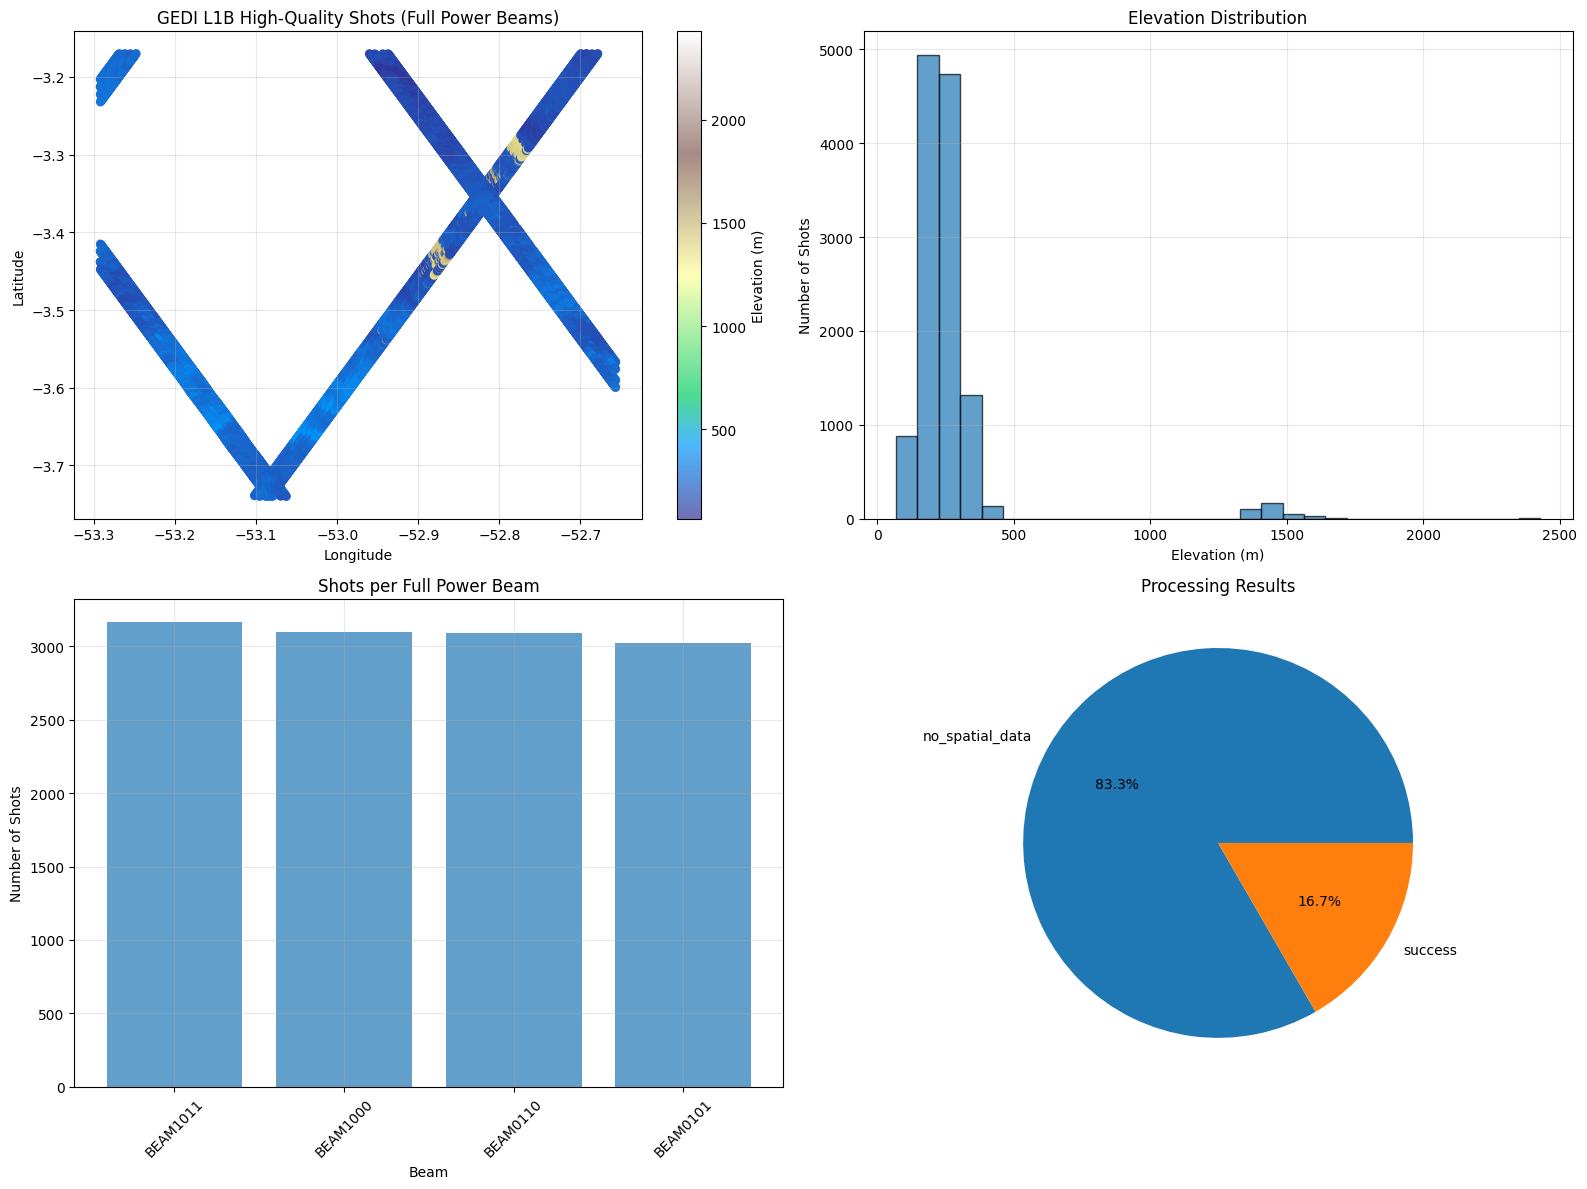


🗺️ Creating interactive map...

PROCESSING COMPLETE
✅ Data search completed
✅ Full Power beams processing only
✅ Automatic retry for quality data
✅ Demo optimization enabled (5th granule prioritized)
✅ File cleanup for unusable data
✅ Results exported

🔧 Next steps:
   - Modify aoi_bbox for your study area
   - Adjust quality filtering criteria if needed
   - Add waveform analysis functions
   - Process additional granules if needed

📁 Output files saved to: ./gedi_L1B_outputs/


In [30]:
# 4. Authenticate with NASA Earthdata
# To download GEDI data, you need a NASA Earthdata account. If you don't have one, you can register for free.
# Run the authentication cell in the notebook, which will prompt you for your Earthdata credentials.


# Authenticate with NASA Earthdata
auth = earthaccess.login()

if auth.authenticated:
    print("✓ Successfully authenticated with NASA Earthdata!")
else:
    print("✗ Authentication failed. Please check your credentials.")

# Define your Area of Interest (AOI)
# Example: Pará and Northeast Pará and surrounding area near Double Springs 58.8982679169921823,-9.8411685263671949 : -46.0613679169921824,2.5911314736328070  ////-49.8971801984433938,-4.3451970939528763 : -45.6634012858677067,-0.5800425648302245
# Example 2: Medicilância: -53.2922282284325135,-3.7400166646731070, -52.6564362918175277,-3.1698933787883066
DEFAULT_AOI = [-53.2922282284325135,-3.7400166646731070, -52.6564362918175277,-3.1698933787883066]  # Default demo AOI
aoi_bbox = [-53.2922282284325135,-3.7400166646731070, -52.6564362918175277,-3.1698933787883066]  # [min_lon, min_lat, max_lon, max_lat]

# Check if user is using default AOI (for demo optimization)
is_default_aoi = (aoi_bbox == DEFAULT_AOI)

print(f"Area of Interest (Bounding Box): {aoi_bbox}")
print(f"Longitude range: {aoi_bbox[0]} to {aoi_bbox[2]}")
print(f"Latitude range: {aoi_bbox[1]} to {aoi_bbox[3]}")

if is_default_aoi:
    print("🎯 Using default AOI - will prioritize 5th granule for demo efficiency")
else:
    print("📍 Using custom AOI - will process granules in standard order")

# Define temporal range (2019-04-01-min value)
start_date = "2024-06-01" # Start of GEDI data aquisition
end_date = "2025-10-22" # Can update

print(f"Temporal range: {start_date} to {end_date}")

# Define Full Power beams only
FULL_POWER_BEAMS = ['BEAM0101', 'BEAM0110', 'BEAM1000', 'BEAM1011']
print(f"Processing Full Power beams only: {FULL_POWER_BEAMS}")

# Search for GEDI L1B granules - FIXED VERSION
def search_gedi_l1b(bbox, start_date, end_date, max_results=2000):##40
    """
    Search for GEDI L1B granules - Fixed for newer earthaccess versions
    Increased max_results to have more options if files don't contain quality data

    Parameters:
    bbox: list of [min_lon, min_lat, max_lon, max_lat]
    """
    print(f"Searching for GEDI L1B data...")
    print(f"  Bounding box: {bbox}")
    print(f"  Date range: {start_date} to {end_date}")
    print(f"  Max results: {max_results}")

    # FIXED: Pass bounding box coordinates as separate arguments
    min_lon, min_lat, max_lon, max_lat = bbox

    try:
        results = earthaccess.search_data(
            short_name="GEDI01_B",
            version="002",
            bounding_box=(min_lon, min_lat, max_lon, max_lat),  # As tuple with 4 values
            temporal=(start_date, end_date),
            count=max_results
        )

        print(f"Found {len(results)} GEDI L1B granules")
        return results

    except Exception as e:
        print(f"Error in search: {str(e)}")
        print("Trying alternative bounding box format...")

        # Alternative format if the above doesn't work
        try:
            results = earthaccess.search_data(
                short_name="GEDI01_B",
                version="002",
                bounding_box=f"{min_lon},{min_lat},{max_lon},{max_lat}",  # As string
                temporal=(start_date, end_date),
                count=max_results
            )

            print(f"Found {len(results)} GEDI L1B granules")
            return results

        except Exception as e2:
            print(f"Second attempt failed: {str(e2)}")
            print("Trying without bounding box (will filter spatially later)...")

            # Last resort: search without spatial filter
            try:
                results = earthaccess.search_data(
                    short_name="GEDI01_B",
                    version="002",
                    temporal=(start_date, end_date),
                    count=max_results * 2  # Get more results to filter later
                )

                print(f"Found {len(results)} GEDI L1B granules (will filter spatially)")
                return results

            except Exception as e3:
                print(f"All search attempts failed: {str(e3)}")
                return []

# Extract and process data - Full Power beams only
def extract_gedi_l1b_data(file_path, aoi_bbox, full_power_beams_only=True):
    """Extract GEDI L1B data with spatial filtering - Full Power beams only"""
    extracted_data = {}

    print(f"\nOpening GEDI file: {os.path.basename(file_path)}")

    try:
        with h5py.File(file_path, 'r') as gedi_file:
            # Get all beam names
            all_beam_names = [key for key in gedi_file.keys() if key.startswith('BEAM')]

            # Filter to Full Power beams only
            if full_power_beams_only:
                beam_names = [beam for beam in all_beam_names if beam in FULL_POWER_BEAMS]
                print(f"Available beams: {all_beam_names}")
                print(f"Full Power beams found: {beam_names}")
            else:
                beam_names = all_beam_names
                print(f"Available beams: {beam_names}")

            if not beam_names:
                print("❌ No Full Power beams found in this file!")
                return {}

            for beam in beam_names:
                try:
                    print(f"\n  Processing {beam}...")

                    # Check if required datasets exist
                    required_datasets = [
                        f'{beam}/geolocation/latitude_bin0',
                        f'{beam}/geolocation/longitude_bin0',
                        f'{beam}/shot_number',
                        f'{beam}/geolocation/degrade',
                        f'{beam}/stale_return_flag',
                        f'{beam}/geolocation/elevation_bin0'
                    ]

                    missing_datasets = [ds for ds in required_datasets if ds not in gedi_file]
                    if missing_datasets:
                        print(f"    ⚠️ Missing datasets: {missing_datasets}")
                        continue

                    # Extract coordinate data
                    # The GEDI elevation_bin0 dataset refers to the height above the World Geodetic System 1984 (WGS84) reference ellipsoid, as interpolated from a pre-existing digital elevation model (DEM).
                    # This value provides a reference point for the ground elevation within a GEDI laser footprint.
                    lat = gedi_file[f'{beam}/geolocation/latitude_bin0'][:]
                    lon = gedi_file[f'{beam}/geolocation/longitude_bin0'][:]
                    shot_number = gedi_file[f'{beam}/shot_number'][:]
                    degrade_flag = gedi_file[f'{beam}/geolocation/degrade'][:]
                    stale_return_flag = gedi_file[f'{beam}/stale_return_flag'][:]
                    elev_bin0 = gedi_file[f'{beam}/geolocation/elevation_bin0'][:]

                    print(f"    Total shots in beam: {len(lat)}")

                    # Apply spatial filter
                    spatial_mask = (
                        (lon >= aoi_bbox[0]) & (lon <= aoi_bbox[2]) &
                        (lat >= aoi_bbox[1]) & (lat <= aoi_bbox[3])
                    )

                    spatial_shots = np.sum(spatial_mask)
                    print(f"    Shots in AOI: {spatial_shots}")

                    if spatial_shots > 0:
                        extracted_data[beam] = {
                            'latitude': lat[spatial_mask],
                            'longitude': lon[spatial_mask],
                            'shot_number': shot_number[spatial_mask],
                            'degrade_flag': degrade_flag[spatial_mask],
                            'stale_return_flag': stale_return_flag[spatial_mask],
                            'elevation_bin0': elev_bin0[spatial_mask]
                        }
                        print(f"    ✓ Extracted {spatial_shots} shots from {beam}")
                    else:
                        print(f"    ✗ No shots found in AOI for {beam}")

                except Exception as e:
                    print(f"    ❌ Error processing {beam}: {str(e)}")
                    continue

        return extracted_data

    except Exception as e:
        print(f"❌ Error opening file: {str(e)}")
        return {}

# Apply quality filtering with detailed reporting
def apply_quality_filters(gedi_data, verbose=True):
    """Apply standard GEDI quality filters with detailed reporting"""
    if verbose:
        print(f"\nApplying quality filters...")
        print("  Criteria: degrade_flag = 0, stale_return_flag = 0")

    filtered_data = {}
    total_before = 0
    total_after = 0

    for beam, data in gedi_data.items():
        if len(data['shot_number']) == 0:
            continue

        # Apply quality filters
        quality_mask = (
            (data['degrade_flag'] == 0) &
            (data['stale_return_flag'] == 0)
        )

        shots_before = len(data['shot_number'])
        shots_after = np.sum(quality_mask)
        retention_rate = (shots_after / shots_before * 100) if shots_before > 0 else 0

        total_before += shots_before
        total_after += shots_after

        if verbose:
            print(f"  {beam}: {shots_before} → {shots_after} shots ({retention_rate:.1f}% retained)")

        if shots_after > 0:
            filtered_data[beam] = {
                'latitude': data['latitude'][quality_mask],
                'longitude': data['longitude'][quality_mask],
                'shot_number': data['shot_number'][quality_mask],
                'elevation_bin0': data['elevation_bin0'][quality_mask],
                'degrade_flag': data['degrade_flag'][quality_mask],
                'stale_return_flag': data['stale_return_flag'][quality_mask]
            }

    overall_retention = (total_after / total_before * 100) if total_before > 0 else 0

    if verbose:
        print(f"\nOverall: {total_before} → {total_after} shots ({overall_retention:.1f}% retained)")

    return filtered_data, overall_retention, total_after

def delete_file_safely(file_path):
    """Safely delete a file with confirmation"""
    try:
        if os.path.exists(file_path):
            os.remove(file_path)
            print(f"🗑️ Deleted file: {os.path.basename(file_path)}")
            return True
        else:
            print(f"⚠️ File not found for deletion: {file_path}")
            return False
    except Exception as e:
        print(f"❌ Error deleting file {file_path}: {str(e)}")
        return False

def process_gedi_granules_with_retry(gedi_granules, aoi_bbox, is_default_aoi=False, max_attempts=None):
    """
    Processa todos os granules encontrados, sem parar no primeiro com dados válidos.
    """
    download_dir = "./gedi_data"
    os.makedirs(download_dir, exist_ok=True)

    processed_files = []
    all_results = []

    # If you don't specify max_attempts, it processes all.
    if max_attempts is None:
        max_attempts = len(gedi_granules)

    for idx, granule in enumerate(gedi_granules[:max_attempts]):
        try:
            granule_id = granule['umm']['GranuleUR']
        except:
            granule_id = f"Granule_{idx+1}"

        print(f"\n{'='*80}")
        print(f"PROCESSANDO GRANULE {idx+1}/{len(gedi_granules)}: {granule_id}")
        print(f"{'='*80}")

        # Download
        try:
            downloaded_files = earthaccess.download([granule], local_path=download_dir)
            if not downloaded_files:
                print(f"❌ Falha no download de {granule_id}")
                continue
            sample_file = downloaded_files[0]
            file_size = os.path.getsize(sample_file) / 1e9
            print(f"✓ Baixado: {os.path.basename(sample_file)} ({file_size:.2f} GB)")
        except Exception as e:
            print(f"❌ Erro no download de {granule_id}: {str(e)}")
            continue

        # Processing
        gedi_data = extract_gedi_l1b_data(sample_file, aoi_bbox, full_power_beams_only=True)
        if not gedi_data:
            delete_file_safely(sample_file)
            processed_files.append({'granule_id': granule_id, 'status': 'no_spatial_data'})
            continue

        filtered_data, retention_rate, shots_after_qa = apply_quality_filters(gedi_data)

        total_shots_extracted = sum(len(v['shot_number']) for v in gedi_data.values())
        processed_files.append({
            'granule_id': granule_id,
            'file_name': os.path.basename(sample_file),
            'file_size_gb': file_size,
            'shots_extracted': total_shots_extracted,
            'shots_after_qa': shots_after_qa,
            'retention_rate': retention_rate,
            'status': 'success' if shots_after_qa > 0 else 'no_quality_data'
        })

        if shots_after_qa > 0:
            # Add the data to the complete set
            for beam, data in filtered_data.items():
                df = pd.DataFrame({
                    'granule_id': granule_id,
                    'beam': beam,
                    'shot_number': data['shot_number'],
                    'latitude': data['latitude'],
                    'longitude': data['longitude'],
                    'elevation_bin0': data['elevation_bin0']
                })
                all_results.append(df)

        else:
            delete_file_safely(sample_file)

    # Concatenates all results
    if all_results:
        result_df = pd.concat(all_results, ignore_index=True)
        print(f"\n🎉 Processamento completo: {len(result_df)} disparos de alta qualidade extraídos!")
        success = True
    else:
        print(f"\n❌ Nenhum granule teve dados de qualidade.")
        result_df = None
        success = False

    return success, result_df, processed_files, None

# Perform the search
print(f"\n🔍 Searching for GEDI L1B granules...")
gedi_granules = search_gedi_l1b(aoi_bbox, start_date, end_date, max_results=2000)##40

if gedi_granules:
    print(f"\n📋 Found granules:")
    for i, granule in enumerate(gedi_granules[:2]):  # Show first 5
        try:
            granule_id = granule['umm']['GranuleUR']
            demo_note = " (← DEMO PRIORITY)" if is_default_aoi and i == 1 else ""
            print(f"  {i+1}. {granule_id}{demo_note}")
        except:
            print(f"  {i+1}. Granule found (ID extraction failed)")

    if len(gedi_granules) > 2:
        print(f"  ... and {len(gedi_granules) - 2} more granules")

    # Process granules with automatic retry (and demo optimization if applicable)
    print(f"\n🚀 Starting processing with automatic retry...")
    success, result_df, processing_log, final_file = process_gedi_granules_with_retry(
    gedi_granules, aoi_bbox, is_default_aoi=is_default_aoi, max_attempts=len(gedi_granules)
)

    # Display processing summary
    print(f"\n{'='*80}")
    print("PROCESSING SUMMARY")
    print(f"{'='*80}")

    processing_df = pd.DataFrame(processing_log)
    if not processing_df.empty:
        print(f"\nFiles processed:")
        for _, row in processing_df.iterrows():
            status_icon = {
                'success': '✅',
                'no_spatial_data': '🚫',
                'no_quality_data': '❌',
                'processed': '📊'
            }.get(row['status'], '❓')

            print(f"  {status_icon} {row['file_name']} ({row['file_size_gb']:.2f} GB)")
            print(f"      Status: {row['status']}")
            print(f"      Shots extracted: {row['shots_extracted']}")
            print(f"      Shots after QA: {row['shots_after_qa']}")
            print(f"      Retention rate: {row['retention_rate']:.1f}%")

    if success and result_df is not None:
        print(f"\n🎉 FINAL RESULTS:")
        print(f"  ✅ Successfully processed granule with quality data")
        print(f"  📊 Total high-quality shots: {len(result_df)}")
        print(f"  🎯 Full Power beams processed: {result_df['beam'].nunique()}")

        # Display sample data
        print(f"\n📋 Sample of processed data:")
        print(result_df.head(10))

        print(f"\n📈 Data summary:")
        print(f"  Beams processed: {result_df['beam'].nunique()}")
        print(f"  Shots per beam: {result_df.groupby('beam').size().to_dict()}")
        print(f"  Elevation range: {result_df['elevation_bin0'].min():.1f} to {result_df['elevation_bin0'].max():.1f} m")
        print(f"  Latitude range: {result_df['latitude'].min():.6f} to {result_df['latitude'].max():.6f}")
        print(f"  Longitude range: {result_df['longitude'].min():.6f} to {result_df['longitude'].max():.6f}")

        # Export results
        output_dir = "./gedi_L1B_outputs"
        os.makedirs(output_dir, exist_ok=True)

        # Export main results
        csv_path = os.path.join(output_dir, "gedi_l1b_quality_filtered_full_power.csv")
        result_df.to_csv(csv_path, index=False)
        print(f"\n💾 Results exported to: {csv_path}")

        # Export processing log
        log_path = os.path.join(output_dir, "processing_log.csv")
        processing_df.to_csv(log_path, index=False)
        print(f"💾 Processing log exported to: {log_path}")

        # Create visualization
        print(f"\n📊 Creating visualizations...")
        plt.figure(figsize=(16, 10))

        # Create subplot layout
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

        # Plot 1: Shot locations colored by elevation
        scatter = ax1.scatter(result_df['longitude'], result_df['latitude'],
                            c=result_df['elevation_bin0'], cmap='terrain', s=30, alpha=0.7)
        ax1.set_xlabel('Longitude')
        ax1.set_ylabel('Latitude')
        ax1.set_title('GEDI L1B High-Quality Shots (Full Power Beams)')
        ax1.grid(True, alpha=0.3)
        plt.colorbar(scatter, ax=ax1, label='Elevation (m)')

        # Plot 2: Elevation histogram
        ax2.hist(result_df['elevation_bin0'], bins=30, alpha=0.7, edgecolor='black')
        ax2.set_xlabel('Elevation (m)')
        ax2.set_ylabel('Number of Shots')
        ax2.set_title('Elevation Distribution')
        ax2.grid(True, alpha=0.3)

        # Plot 3: Shots per beam
        beam_counts = result_df['beam'].value_counts()
        ax3.bar(beam_counts.index, beam_counts.values, alpha=0.7)
        ax3.set_xlabel('Beam')
        ax3.set_ylabel('Number of Shots')
        ax3.set_title('Shots per Full Power Beam')
        ax3.grid(True, alpha=0.3)
        plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)

        # Plot 4: Processing attempts
        status_counts = processing_df['status'].value_counts()
        ax4.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%')
        ax4.set_title('Processing Results')

        plt.tight_layout()
        plt.show()

        # Create interactive map
        print(f"\n🗺️ Creating interactive map...")
        center_lat = result_df['latitude'].mean()
        center_lon = result_df['longitude'].mean()

        m = folium.Map(location=[center_lat, center_lon], zoom_start=13)

        # Add AOI rectangle
        folium.Rectangle(
            bounds=[[aoi_bbox[1], aoi_bbox[0]], [aoi_bbox[3], aoi_bbox[2]]],
            fill=False,
            color='red',
            weight=3,
            popup='Area of Interest'
        ).add_to(m)

        # Color map for different beams
        beam_colors = {'BEAM0101': 'red', 'BEAM0110': 'blue', 'BEAM1000': 'green', 'BEAM1011': 'orange'}

        # Add points colored by beam
        for _, row in result_df.iterrows():
            color = beam_colors.get(row['beam'], 'gray')
            folium.CircleMarker(
                location=[row['latitude'], row['longitude']],
                radius=4,
                popup=f"Beam: {row['beam']}<br>Shot: {row['shot_number']}<br>Elevation: {row['elevation_bin0']:.1f}m",
                color=color,
                fillColor=color,
                fillOpacity=0.7
            ).add_to(m)

        # Add legend
        legend_html = '''
        <div style="position: fixed;
                    bottom: 50px; left: 50px; width: 150px; height: 90px;
                    background-color: white; border:2px solid grey; z-index:9999;
                    font-size:14px; padding: 10px">
        <p><b>Full Power Beams</b></p>
        <p><i class="fa fa-circle" style="color:red"></i> BEAM0101</p>
        <p><i class="fa fa-circle" style="color:blue"></i> BEAM0110</p>
        <p><i class="fa fa-circle" style="color:green"></i> BEAM1000</p>
        <p><i class="fa fa-circle" style="color:orange"></i> BEAM1011</p>
        </div>
        '''
        m.get_root().html.add_child(folium.Element(legend_html))

        # Display map
        m

    else:
        print(f"\n❌ PROCESSING FAILED:")
        print(f"  No granules contained quality data in the AOI")
        print(f"  Files attempted: {len(processing_log)}")
        print(f"\n💡 Suggestions:")
        print(f"    - Expand your AOI bounding box")
        print(f"    - Try a different time period")
        print(f"    - Check if your AOI is in a valid GEDI coverage area (±51.6° latitude)")

else:
    print("❌ No granules found. Try expanding your search criteria.")

print(f"\n{'='*80}")
print("PROCESSING COMPLETE")
print(f"{'='*80}")
print("✅ Data search completed")
print("✅ Full Power beams processing only")
print("✅ Automatic retry for quality data")
if is_default_aoi:
    print("✅ Demo optimization enabled (5th granule prioritized)")
print("✅ File cleanup for unusable data")
print("✅ Results exported")
print("\n🔧 Next steps:")
print("   - Modify aoi_bbox for your study area")
print("   - Adjust quality filtering criteria if needed")
print("   - Add waveform analysis functions")
print("   - Process additional granules if needed")
print("\n📁 Output files saved to: ./gedi_L1B_outputs/")

In [ ]:
####### Code runs by using coordinates ##

from time import sleep
import gc

# ================= Set up ===================
gedi_dir = "/content/gedi_data"
output_dir = "/content/waveform_plots"
os.makedirs(output_dir, exist_ok=True)

show_plots = True
pause_time = 1
tol = 1e-5  # tolerance in degrees (~1 m)

# 👉 Specific coordinates (set manually or use input)
latitude = float(input("Enter the desired latitude (5 decimal places): "))
longitude = float(input("Enter the desired longitude (5 decimal places): "))

# ===================================================

def process_waveform(beam, shot, f, file_name, output_dir):
    """Extracts and saves the 1 waveform graph"""
    try:
        if f"{beam}/shot_number" not in f:
            return False

        shot_numbers = f[f"{beam}/shot_number"][:]
        idx = np.where(shot_numbers == shot)[0]
        if len(idx) == 0:
            return False
        idx = idx[0]

        wf_full = f[f"{beam}/rxwaveform"][:]
        start = f[f"{beam}/rx_sample_start_index"][idx]
        count = f[f"{beam}/rx_sample_count"][idx]

        elev0 = f[f"{beam}/geolocation/elevation_bin0"][idx]
        elev_last = f[f"{beam}/geolocation/elevation_lastbin"][idx]
        lat = f[f"{beam}/geolocation/latitude_bin0"][idx]
        lon = f[f"{beam}/geolocation/longitude_bin0"][idx]

        waveform = wf_full[start:start+count]
        elevations = np.linspace(elev0, elev_last, len(waveform))

        # Point of maximum amplitude
        max_amp_idx = np.argmax(waveform)
        max_amp_elevation = elevations[max_amp_idx]
        max_amp_value = waveform[max_amp_idx]

        plt.figure(figsize=(8, 10))
        plt.plot(waveform, elevations, 'b', linewidth=2, label='Waveform')
        plt.scatter(max_amp_value, max_amp_elevation, color='red', s=50, label=f'Max Amp: {max_amp_elevation:.1f}m')
        plt.axhline(y=elev0, color='r', linestyle='--', label=f'Top: {elev0:.1f}m')
        plt.axhline(y=elev_last, color='g', linestyle='--', label=f'Bottom: {elev_last:.1f}m')
        plt.xlabel("Waveform Amplitude", fontsize=12)
        plt.ylabel("Elevation (m)", fontsize=12)
        plt.title(f"Shot {shot} - {beam}\nLat: {lat:.5f}, Lon: {lon:.5f}\nFile: {file_name}", fontsize=13)
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        save_path = os.path.join(output_dir, f"{beam}_{shot}.png")
        plt.savefig(save_path, dpi=200, bbox_inches='tight')
        plt.close()

        print(f"💾 Saved {save_path}")
        return True

    except Exception as e:
        print(f"Error processing {beam}-{shot}: {e}")
        return False


def process_gedi_by_coord(gedi_dir, lat_alvo, lon_alvo, output_dir, tol=1e-5):
    """Search and extract waveforms for a specific latitude/longitude."""
    total_found = 0
    files = [os.path.join(gedi_dir, f) for f in os.listdir(gedi_dir) if f.endswith('.h5')]

    for file_path in files:
        try:
            with h5py.File(file_path, 'r') as f:
                available_beams = list(f.keys())
                print(f"🔍 Checking {os.path.basename(file_path)} ({len(available_beams)} beams)")

                for beam in available_beams:
                    if not (f"{beam}/geolocation/latitude_bin0" in f):
                        continue

                    lat_all = f[f"{beam}/geolocation/latitude_bin0"][:]
                    lon_all = f[f"{beam}/geolocation/longitude_bin0"][:]
                    shots_all = f[f"{beam}/shot_number"][:]

                    # Find coordinates within tolerance.
                    idx = np.where(
                        (np.abs(lat_all - lat_alvo) <= tol) &
                        (np.abs(lon_all - lon_alvo) <= tol)
                    )[0]

                    if len(idx) > 0:
                        shot = shots_all[idx[0]]
                        print(f"✅ Found in {os.path.basename(file_path)} — {beam}, shot {shot}")
                        ok = process_waveform(beam, shot, f,
                                              os.path.basename(file_path), output_dir)
                        if ok:
                            total_found += 1
                            if show_plots:
                                plt.show()
                                sleep(pause_time)

        except Exception as e:
            print(f"⚠️ Error reading {os.path.basename(file_path)}: {e}")

        gc.collect()

    print(f"\n🎯 Total number of waveforms extracted and saved: {total_found}")


# ================= Performance ===================
process_gedi_by_coord(
    gedi_dir=gedi_dir,
    lat_alvo=latitude,
    lon_alvo=longitude,
    output_dir=output_dir,
    tol=tol
)


In [ ]:
####### Code runs by using a csv file ##

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import gc

# ================= PARAMETERS ====================
gedi_dir = "/content/gedi_data"
csv_path = "/content/points/GEDI_L1B_Medicilandia_reduced.csv"
output_dir = "/content/waveform_plots"
os.makedirs(output_dir, exist_ok=True)

tol = 1e-5  # tolerância
# =================================================


def find_shot_by_coord_stream(f, beam, lat_alvo, lon_alvo, tol, chunk=20000):
    """
    Busca coordenada sem carregar arrays inteiros.
    Lê latitude/longitude em blocos menores.
    """
    lat_ds = f[f"{beam}/geolocation/latitude_bin0"]
    lon_ds = f[f"{beam}/geolocation/longitude_bin0"]
    shot_ds = f[f"{beam}/shot_number"]

    total = lat_ds.shape[0]

    for i in range(0, total, chunk):
        end = min(i + chunk, total)
        lat = lat_ds[i:end]
        lon = lon_ds[i:end]

        idx = np.where(
            (np.abs(lat - lat_alvo) <= tol) &
            (np.abs(lon - lon_alvo) <= tol)
        )[0]

        if len(idx) > 0:
            return int(shot_ds[i + idx[0]])

    return None


def extract_waveform_minimal(f, beam, shot):
    """
    Extrai somente o waveform do shot desejado sem carregar todo o rxwaveform.
    """
    # busca índice do shot
    shots = f[f"{beam}/shot_number"]

    # procurar em blocos
    for i in range(0, shots.shape[0], 20000):
        end = min(i + 20000, shots.shape[0])
        block = shots[i:end]
        idx = np.where(block == shot)[0]
        if len(idx) > 0:
            idx = i + idx[0]
            break
    else:
        return None

    # acessa metadata
    start = int(f[f"{beam}/rx_sample_start_index"][idx])
    count = int(f[f"{beam}/rx_sample_count"][idx])

    elev0 = float(f[f"{beam}/geolocation/elevation_bin0"][idx])
    elev_last = float(f[f"{beam}/geolocation/elevation_lastbin"][idx])

    # lê somente o intervalo necessário
    rx = f[f"{beam}/rxwaveform"]
    waveform = rx[start:start+count]

    elevations = np.linspace(elev0, elev_last, len(waveform))

    return waveform, elevations


def process(csv_path, gedi_dir, output_dir, tol):
    df = pd.read_csv(csv_path)

    # abrir 1 figura por classe
    figs = {}
    axes = {}

    files = [os.path.join(gedi_dir, x) for x in os.listdir(gedi_dir) if x.endswith(".h5")]

    for idx, row in df.iterrows():
        lat, lon, classe = row["latitude"], row["longitude"], row["classe"]
        print(f"\n🔍 Ponto {idx+1}: classe {classe} ({lat}, {lon})")

        if classe not in figs:
            figs[classe], axes[classe] = plt.subplots(figsize=(7, 10))

        ax = axes[classe]

        found = False

        for fp in files:
            with h5py.File(fp, "r") as f:
                for beam in f.keys():
                    if f"{beam}/geolocation/latitude_bin0" not in f:
                        continue

                    shot = find_shot_by_coord_stream(f, beam, lat, lon, tol)

                    if shot is None:
                        continue

                    print(f"✔ Encontrado: {os.path.basename(fp)} → {beam}, shot {shot}")

                    result = extract_waveform_minimal(f, beam, shot)
                    if result is None:
                        continue

                    wf, elev = result

                    # adicionar curva ao gráfico imediatamente (não guarda em memória)
                    ax.plot(wf, elev, linewidth=0.8)

                    found = True
                    break

            if found:
                break

        gc.collect()

    # salvar todas as figuras
    print("\n📊 Salvando imagens...")
    for classe, fig in figs.items():
        ax = axes[classe]
        ax.set_xlabel("Amplitude")
        ax.set_ylabel("Elevação (m)")
        ax.set_title(f"Waveforms da Classe {classe}")
        ax.grid(alpha=0.3)

        fig.tight_layout()
        save_path = os.path.join(output_dir, f"classe_{classe}.png")
        fig.savefig(save_path, dpi=200)
        plt.close(fig)
        print(f"  💾 {save_path}")

    print("\n🏁 Finalizado com uso mínimo de memória!\n")


# executar
process(csv_path, gedi_dir, output_dir, tol)

In [ ]:
## Code runs by using csv, creating a mean and std graph ##

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import gc

# ================= PARAMETERS ====================
#.csv needs latitude, longitude, classe
gedi_dir = "/content/gedi_data"
csv_path = "/content/points/GEDI_L1B_Medicilandia_samples.csv"
output_dir = "/content/waveform_plots"
os.makedirs(output_dir, exist_ok=True)

tol = 1e-5
N_GRID = 400  # grid comum de elevação
# =================================================


def find_shot_by_coord_stream(f, beam, lat_alvo, lon_alvo, tol, chunk=20000):
    lat = f[f"{beam}/geolocation/latitude_bin0"]
    lon = f[f"{beam}/geolocation/longitude_bin0"]
    shots = f[f"{beam}/shot_number"]

    total = len(lat)

    for i in range(0, total, chunk):
        end = min(i + chunk, total)
        block_lat = lat[i:end]
        block_lon = lon[i:end]

        idx = np.where(
            (np.abs(block_lat - lat_alvo) <= tol) &
            (np.abs(block_lon - lon_alvo) <= tol)
        )[0]

        if len(idx) > 0:
            return int(shots[i + idx[0]])

    return None


def extract_waveform_minimal(f, beam, shot):
    shots = f[f"{beam}/shot_number"]

    # busca sequencial
    for i in range(0, shots.shape[0], 20000):
        end = min(i + 20000, shots.shape[0])
        block = shots[i:end]
        idx = np.where(block == shot)[0]
        if len(idx):
            idx = i + idx[0]
            break
    else:
        return None

    start = int(f[f"{beam}/rx_sample_start_index"][idx])
    count = int(f[f"{beam}/rx_sample_count"][idx])

    elev0 = float(f[f"{beam}/geolocation/elevation_bin0"][idx])
    elev_last = float(f[f"{beam}/geolocation/elevation_lastbin"][idx])

    waveform = f[f"{beam}/rxwaveform"][start:start + count]
    elevations = np.linspace(elev0, elev_last, len(waveform))

    return waveform, elevations


def process(csv_path, gedi_dir, output_dir, tol):
    df = pd.read_csv(csv_path)

    class_waveforms = {}   # armazena curvas reamostradas
    class_elev_grids = {}  # eixo Y comum

    files = [os.path.join(gedi_dir, f) for f in os.listdir(gedi_dir) if f.endswith(".h5")]

    for idx, row in df.iterrows():
        lat, lon, classe = row["latitude"], row["longitude"], row["classe"]
        print(f"\n🔍 Procurando: classe {classe}, ponto {idx+1}")

        if classe not in class_waveforms:
            class_waveforms[classe] = []
            class_elev_grids[classe] = None

        found = False

        for fp in files:
            with h5py.File(fp, "r") as f:

                for beam in f.keys():
                    if f"{beam}/geolocation/latitude_bin0" not in f:
                        continue

                    shot = find_shot_by_coord_stream(f, beam, lat, lon, tol)
                    if not shot:
                        continue

                    print(f"✔ Encontrado em {fp} → {beam}, shot {shot}")

                    result = extract_waveform_minimal(f, beam, shot)
                    if not result:
                        continue

                    wf, elev = result

                    # Cria um grid fixo semelhante ao comprimento de onda no R
                    if class_elev_grids[classe] is None:
                        class_elev_grids[classe] = np.linspace(
                            max(elev), min(elev), N_GRID
                        )

                    elev_grid = class_elev_grids[classe]

                    wf_interp = np.interp(elev_grid, elev[::-1], wf[::-1])
                    class_waveforms[classe].append(wf_interp)

                    found = True
                    break

            if found:
                break

        gc.collect()


    # ====================================================
    #            FINAL: PLOT MÉDIA + DESVIO
    # ====================================================
    for classe in class_waveforms.keys():

        wave_list = class_waveforms[classe]
        elev_grid = class_elev_grids[classe]

        if len(wave_list) == 0:
            continue

        n_waveforms = len(wave_list)   # <<< número de waveforms

        arr = np.vstack(wave_list)
        mean_curve = arr.mean(axis=0)
        std_curve = arr.std(axis=0)

        plt.figure(figsize=(10, 12))

        # ribbon (área de desvio)
        plt.fill_betweenx(
            elev_grid,
            mean_curve - std_curve,
            mean_curve + std_curve,
            color="cornflowerblue",
            alpha=0.25,
            label="Standard Deviation"
        )

        # linha média
        plt.plot(mean_curve, elev_grid, color="blue", linewidth=2.5, label="Mean")

        # manter direção original
        plt.xlabel("Waveform Amplitude", fontsize=12,fontweight="bold")
        plt.ylabel("Elevation (m)", fontsize=12, fontweight="bold")
        plt.title(f"Waveform – {classe}", fontsize=14,fontweight="bold")
        plt.grid(alpha=0.3)
        plt.legend()

        # Fixar escala vertical entre -20 e 80 m
        plt.ylim(-20, 60)
        plt.xlim(0, 700)

        # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
        # Inserir texto com número de waveforms
        plt.text(
            0.02, 0.95,
            f"Number of Waveforms: {n_waveforms}",
            transform=plt.gca().transAxes,
            fontsize=12,
            verticalalignment='top',
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
        )
        # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

        plt.tight_layout()
        save_path = os.path.join(output_dir, f"{classe}_media_desvio.png")
        plt.savefig(save_path, dpi=250)
        plt.close()

        print(f"💾 Salvo: {save_path}")


# executar
process(csv_path, gedi_dir, output_dir, tol)


In [ ]:
# ======================== MELHORADO: comparação entre waveforms + remoção robusta ========================
# Mantida sua estrutura, apenas adicionados métodos melhores para comparar waveforms.

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import gc

# ================= PARAMETERS ====================
gedi_dir = "/content/gedi_data"
csv_path = "/content/points/culturas_perenes_amostras.csv"
output_dir = "/content/waveform_plots"
os.makedirs(output_dir, exist_ok=True)

tol = 1e-5
N_GRID = 400
# =================================================


def find_shot_by_coord_stream(f, beam, lat_alvo, lon_alvo, tol, chunk=20000):
    lat = f[f"{beam}/geolocation/latitude_bin0"]
    lon = f[f"{beam}/geolocation/longitude_bin0"]
    shots = f[f"{beam}/shot_number"]

    total = len(lat)
    for i in range(0, total, chunk):
        end = min(i + chunk, total)
        block_lat = lat[i:end]
        block_lon = lon[i:end]

        idx = np.where(
            (np.abs(block_lat - lat_alvo) <= tol) &
            (np.abs(block_lon - lon_alvo) <= tol)
        )[0]

        if len(idx) > 0:
            return int(shots[i + idx[0]])

    return None


def extract_waveform_minimal(f, beam, shot):
    shots = f[f"{beam}/shot_number"]

    for i in range(0, shots.shape[0], 20000):
        end = min(i + 20000, shots.shape[0])
        block = shots[i:end]
        idx = np.where(block == shot)[0]
        if len(idx):
            idx = i + idx[0]
            break
    else:
        return None

    start = int(f[f"{beam}/rx_sample_start_index"][idx])
    count = int(f[f"{beam}/rx_sample_count"][idx])

    elev0 = float(f[f"{beam}/geolocation/elevation_bin0"][idx])
    elev_last = float(f[f"{beam}/geolocation/elevation_lastbin"][idx])

    waveform = f[f"{beam}/rxwaveform"][start:start + count]
    elevations = np.linspace(elev0, elev_last, len(waveform))

    return waveform, elevations


def rms_distance(a, b):
    """Distância RMS entre dois vetores."""
    return np.sqrt(np.mean((a - b) ** 2))


def process(csv_path, gedi_dir, output_dir, tol):
    df = pd.read_csv(csv_path)

    class_waveforms = {}
    class_elev_grids = {}

    files = [os.path.join(gedi_dir, f) for f in os.listdir(gedi_dir) if f.endswith(".h5")]

    for idx, row in df.iterrows():
        lat, lon, classe = row["latitude"], row["longitude"], row["classe"]
        print(f"\n🔍 Procurando: classe {classe}, ponto {idx+1}")

        if classe not in class_waveforms:
            class_waveforms[classe] = []
            class_elev_grids[classe] = None

        found = False

        for fp in files:
            with h5py.File(fp, "r") as f:

                for beam in f.keys():
                    if f"{beam}/geolocation/latitude_bin0" not in f:
                        continue

                    shot = find_shot_by_coord_stream(f, beam, lat, lon, tol)
                    if not shot:
                        continue

                    print(f"✔ Encontrado em {fp} → {beam}, shot {shot}")

                    result = extract_waveform_minimal(f, beam, shot)
                    if not result:
                        continue

                    wf, elev = result

                    if class_elev_grids[classe] is None:
                        class_elev_grids[classe] = np.linspace(max(elev), min(elev), N_GRID)

                    elev_grid = class_elev_grids[classe]
                    wf_interp = np.interp(elev_grid, elev[::-1], wf[::-1])
                    class_waveforms[classe].append(wf_interp)

                    found = True
                    break

            if found:
                break

        gc.collect()

    # ====================================================
    #            COMPARAÇÃO E REMOÇÃO DE OUTLIERS
    # ====================================================
    for classe in class_waveforms.keys():

        wave_list = class_waveforms[classe]
        elev_grid = class_elev_grids[classe]

        if len(wave_list) == 0:
            continue

        arr = np.vstack(wave_list)

        prelim_mean = arr.mean(axis=0)

        distances = np.array([rms_distance(w, prelim_mean) for w in arr])

        mean_dist = distances.mean()
        std_dist = distances.std()

        threshold = mean_dist + 3 * std_dist

        mask = distances <= threshold
        arr_clean = arr[mask]

        removed = np.sum(~mask)
        kept = np.sum(mask)

        print(f"🧹 Classe {classe}: removidos {removed} outliers, mantidos {kept}")

        arr = arr_clean

        mean_curve = arr.mean(axis=0)
        std_curve = arr.std(axis=0)

        n_waveforms = arr.shape[0]

        # =====================================================
        #                     PLOT FINAL
        # =====================================================
        plt.figure(figsize=(10, 12))

        plt.fill_betweenx(
            elev_grid,
            mean_curve - std_curve,
            mean_curve + std_curve,
            color="cornflowerblue",
            alpha=0.25,
            label="Standard Deviation"
        )

        plt.plot(mean_curve, elev_grid, color="blue", linewidth=2.5, label="Mean")

        # =============== AUMENTO DO TAMANHO DAS FONTES ===============
        plt.xlabel("Waveform Amplitude", fontsize=16, fontweight="bold")
        plt.ylabel("Elevation (m)", fontsize=16, fontweight="bold")
        plt.title(f"Waveform – {classe}", fontsize=20, fontweight="bold")
        plt.legend(fontsize=14)
        # ==============================================================

        plt.grid(alpha=0.3)

        #plt.ylim(60, 160) - transamazonica
        #plt.xlim(0, 1000)

        plt.ylim(-20, 60)
        plt.xlim(0, 700)

        plt.text(
            0.02, 0.95,
            f"Waveforms used: {n_waveforms}",
            transform=plt.gca().transAxes,
            fontsize=14,   # tamanho aumentado
            verticalalignment='top',
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
        )

        plt.tight_layout()
        save_path = os.path.join(output_dir, f"{classe}_comparacao_outliers.png")
        plt.savefig(save_path, dpi=250)
        plt.close()

        print(f"💾 Salvo: {save_path}")


# executar
process(csv_path, gedi_dir, output_dir, tol)



In [ ]:
# ======================== NORMALIZAÇÃO + PLOT COM WAVEFORMS NORMALIZADAS ========================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import gc
from scipy.signal import find_peaks   # <-- ADICIONADO

# ================= PARAMETERS ====================
gedi_dir = "/content/gedi_data"
csv_path = "/content/points/Samples_cocoa_medicilandia.csv"
output_dir = "/content/waveform_plots"
os.makedirs(output_dir, exist_ok=True)

tol = 1e-5
N_GRID = 400
NORMALIZATION_METHOD = "minmax"
ELEVATION_NORM_METHOD = "minmax"
PEAK_RATIO = 0.7     # <-- SOMENTE PICOS ACIMA DE 60%
# =================================================


# =================================================
#       FUNÇÃO DE NORMALIZAÇÃO UNIVERSAL
# =================================================
def normalize_waveform(wf, method="minmax"):
    wf = np.array(wf, dtype=float)

    if method == "minmax":
        wmin, wmax = wf.min(), wf.max()
        if np.isclose(wmax, wmin):
            return np.zeros_like(wf)
        return (wf - wmin) / (wmax - wmin)

    elif method == "l2":
        norm = np.linalg.norm(wf)
        if norm == 0:
            return np.zeros_like(wf)
        return wf / norm

    elif method == "zscore":
        mean = wf.mean()
        std = wf.std()
        if std < 1e-6:
            return np.zeros_like(wf)
        return (wf - mean) / std

    else:
        raise ValueError("Método inválido: use 'minmax', 'l2' ou 'zscore'")

# =================================================
#       NORMALIZAÇÃO DO EIXO Y
# =================================================
def normalize_axis(values, method="minmax"):
    values = np.array(values, dtype=float)

    if method == "minmax":
        vmin, vmax = values.min(), values.max()
        if np.isclose(vmax, vmin):
            return np.zeros_like(values)
        return (values - vmin) / (vmax - vmin)

    elif method == "zscore":
        mean = values.mean()
        std = values.std()
        if std < 1e-6:
            return np.zeros_like(values)
        return (values - mean) / std

    elif method == "l2":
        norm = np.linalg.norm(values)
        if norm < 1e-6:
            return np.zeros_like(values)
        return values / norm

    else:
        raise ValueError("Método inválido para eixo Y")


# =================================================
# 🔥 FUNÇÃO NOVA: CONTAGEM DE PICOS MAIORES QUE 60%
# =================================================
def count_large_peaks_ratio(wave, ratio=0.6, distance=5):
    """
    Conta picos cuja altura seja maior que (ratio * pico máximo da waveform).
    ratio: entre 0 e 1 (ex: 0.6 = picos acima de 60% do valor máximo)
    """
    max_val = wave.max()
    height_min = max_val * ratio
    peaks, props = find_peaks(wave, height=height_min, distance=distance)
    return len(peaks), peaks, props["peak_heights"]


# =================================================
#       FUNÇÕES EXISTENTES
# =================================================
def find_shot_by_coord_stream(f, beam, lat_alvo, lon_alvo, tol, chunk=20000):
    lat = f[f"{beam}/geolocation/latitude_bin0"]
    lon = f[f"{beam}/geolocation/longitude_bin0"]
    shots = f[f"{beam}/shot_number"]

    total = len(lat)
    for i in range(0, total, chunk):
        end = min(i + chunk, total)
        block_lat = lat[i:end]
        block_lon = lon[i:end]

        idx = np.where(
            (np.abs(block_lat - lat_alvo) <= tol) &
            (np.abs(block_lon - lon_alvo) <= tol)
        )[0]

        if len(idx) > 0:
            return int(shots[i + idx[0]])

    return None


def extract_waveform_minimal(f, beam, shot):
    shots = f[f"{beam}/shot_number"]

    for i in range(0, shots.shape[0], 20000):
        end = min(i + 20000, shots.shape[0])
        block = shots[i:end]
        idx = np.where(block == shot)[0]
        if len(idx):
            idx = i + idx[0]
            break
    else:
        return None

    start = int(f[f"{beam}/rx_sample_start_index"][idx])
    count = int(f[f"{beam}/rx_sample_count"][idx])

    elev0 = float(f[f"{beam}/geolocation/elevation_bin0"][idx])
    elev_last = float(f[f"{beam}/geolocation/elevation_lastbin"][idx])

    waveform = f[f"{beam}/rxwaveform"][start:start + count]
    elevations = np.linspace(elev0, elev_last, len(waveform))

    return waveform, elevations


def rms_distance(a, b):
    return np.sqrt(np.mean((a - b) ** 2))


# =================================================
#       PROCESSAMENTO
# =================================================
def process(csv_path, gedi_dir, output_dir, tol):
    df = pd.read_csv(csv_path)

    class_waveforms = {}
    class_elev_grids = {}

    files = [os.path.join(gedi_dir, f) for f in os.listdir(gedi_dir) if f.endswith(".h5")]

    for idx, row in df.iterrows():
        lat, lon, classe = row["latitude"], row["longitude"], row["classe"]
        print(f"\n🔍 Procurando: classe {classe}, ponto {idx+1}")

        if classe not in class_waveforms:
            class_waveforms[classe] = []
            class_elev_grids[classe] = None

        found = False

        for fp in files:
            with h5py.File(fp, "r") as f:

                for beam in f.keys():
                    if f"{beam}/geolocation/latitude_bin0" not in f:
                        continue

                    shot = find_shot_by_coord_stream(f, beam, lat, lon, tol)
                    if not shot:
                        continue

                    print(f"✔ Encontrado em {fp} → {beam}, shot {shot}")

                    result = extract_waveform_minimal(f, beam, shot)
                    if not result:
                        continue

                    wf, elev = result

                    if class_elev_grids[classe] is None:
                        class_elev_grids[classe] = np.linspace(max(elev), min(elev), N_GRID)

                    elev_grid = class_elev_grids[classe]

                    wf_interp = np.interp(elev_grid, elev[::-1], wf[::-1])
                    wf_interp = normalize_waveform(wf_interp, method=NORMALIZATION_METHOD)

                    class_waveforms[classe].append(wf_interp)
                    found = True
                    break

            if found:
                break

        gc.collect()

    # ====================================================
    #            COMPARAÇÃO E REMOÇÃO DE OUTLIERS
    # ====================================================
    for classe in class_waveforms.keys():

        wave_list = class_waveforms[classe]
        elev_grid = class_elev_grids[classe]

        if len(wave_list) == 0:
            print(f"⚠ Classe {classe} não teve nenhuma waveform encontrada.")
            continue

        arr = np.vstack(wave_list)

        prelim_mean = arr.mean(axis=0)
        distances = np.array([rms_distance(w, prelim_mean) for w in arr])

        mean_dist = distances.mean()
        std_dist = distances.std()
        threshold = mean_dist + 3 * std_dist

        mask = distances <= threshold
        arr_clean = arr[mask]

        removed = np.sum(~mask)
        kept = np.sum(mask)

        print(f"🧹 Classe {classe}: removidos {removed} outliers, mantidos {kept}")

        arr = arr_clean

        mean_curve = arr.mean(axis=0)
        std_curve = arr.std(axis=0)

        # =====================================================
        #        🔥 CONTAGEM DE PICOS GRANDES (>70%)
        # =====================================================
        num_large_peaks, peaks_large, heights_large = count_large_peaks_ratio(
            mean_curve, ratio=PEAK_RATIO
        )


        # =====================================================
        #                     PLOT FINAL
        # =====================================================
        elev_norm = normalize_axis(elev_grid, method=ELEVATION_NORM_METHOD)

        plt.figure(figsize=(10, 12))

        plt.fill_betweenx(
            elev_norm,
            mean_curve - std_curve,
            mean_curve + std_curve,
            color="cornflowerblue",
            alpha=0.25,
            label="Standard Deviation"
        )

        plt.plot(mean_curve, elev_norm, color="blue", linewidth=2.5, label="Mean")

        # 🔥 Marca os picos grandes em vermelho
        plt.scatter(mean_curve[peaks_large], elev_norm[peaks_large],
                    color="red", s=60, label="Peaks >70%")

        plt.xlabel("Normalized Waveform", fontsize=18, fontweight="bold")
        plt.ylabel("Normalized Elevation", fontsize=18, fontweight="bold")

        plt.title(
            f"Waveform – {classe}\n"
            f"WF norm: {NORMALIZATION_METHOD} | Elev norm: {ELEVATION_NORM_METHOD}",
            fontsize=20, fontweight="bold"
        )

        plt.legend(fontsize=14)

        # Texto com contagem
        plt.text(
            0.02, 0.02,
            f"Waveforms: {kept}\n"
            f"Peaks >70%: {num_large_peaks}",
            transform=plt.gca().transAxes,
            fontsize=16,
            bbox=dict(facecolor='white', alpha=0.6)
        )

        plt.tick_params(axis='both', labelsize=18)

        plt.grid(alpha=0.3)
        plt.tight_layout()

        # ===== SALVAR O GRÁFICO =====
        save_path = os.path.join(output_dir, f"{classe}_comparacao_outliers_norm.png")
        plt.savefig(save_path, dpi=250)
        plt.close()

        print(f"💾 Salvo: {save_path}")


# executar
process(csv_path, gedi_dir, output_dir, tol)




